In [22]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train.shape

170498071/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

In [3]:
x_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train= y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
classes[9]

'truck'

In [36]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

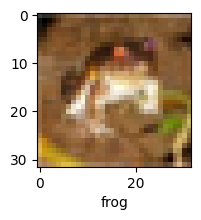

In [10]:
plot_sample(x_train,y_train,0)

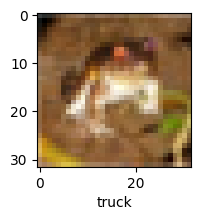

In [11]:
plot_sample(x_train,y_train,1)

In [12]:
x_train = x_train/255
x_test = x_test/255

In [13]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 155s 99ms/step - loss: 1.8090 - accuracy: 0.3552
Epoch 2/5
1563/1563 [==============================] - 153s 98ms/step - loss: 1.6193 - accuracy: 0.4279
Epoch 3/5
1563/1563 [==============================] - 150s 96ms/step - loss: 1.5383 - accuracy: 0.4567
Epoch 4/5
1563/1563 [==============================] - 148s 95ms/step - loss: 1.4807 - accuracy: 0.4789
Epoch 5/5
1563/1563 [==============================] - 150s 96ms/step - loss: 1.4294 - accuracy: 0.4970


In [14]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 11s 34ms/step - loss: 1.4553 - accuracy: 0.4821


[1.4552886486053467, 0.4821000099182129]

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred =  ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report:\n", classification_report(y_test,y_pred_classes))

313/313 [==============================] - 10s 31ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.42      0.52      1000
           1       0.52      0.71      0.60      1000
           2       0.37      0.33      0.35      1000
           3       0.38      0.27      0.31      1000
           4       0.60      0.18      0.27      1000
           5       0.38      0.38      0.38      1000
           6       0.38      0.79      0.51      1000
           7       0.57      0.54      0.55      1000
           8       0.59      0.66      0.62      1000
           9       0.55      0.54      0.55      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



In [24]:
cnn = models.Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [25]:
cnn.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 49s 31ms/step - loss: 1.9909 - accuracy: 0.2701
Epoch 2/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.6142 - accuracy: 0.4218
Epoch 3/10
1563/1563 [==============================] - 48s 31ms/step - loss: 1.4588 - accuracy: 0.4772
Epoch 4/10
1563/1563 [==============================] - 51s 33ms/step - loss: 1.3692 - accuracy: 0.5116
Epoch 5/10
1563/1563 [==============================] - 48s 31ms/step - loss: 1.3010 - accuracy: 0.5381
Epoch 6/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.2413 - accuracy: 0.5618
Epoch 7/10
1563/1563 [==============================] - 48s 31ms/step - loss: 1.1901 - accuracy: 0.5808
Epoch 8/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.1420 - accuracy: 0.5976
Epoch 9/10
1563/1563 [==============================] - 48s 31ms/step - loss: 1.0954 - accuracy: 0.6147
Epoch 10/10
1563/1563 [==============================] - 52s 33m

In [28]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 1.1383 - accuracy: 0.6002


[1.1383426189422607, 0.6001999974250793]

In [30]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

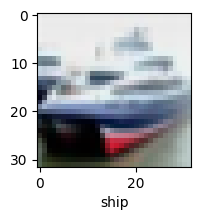

In [38]:
plot_sample(x_test, y_test, 1)

In [39]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 5s 14ms/step


array([[1.53878108e-02, 1.98708405e-03, 1.23915568e-01, 4.59824532e-01,
        2.93572098e-02, 1.95910215e-01, 1.62310153e-01, 5.14096022e-03,
        2.21593026e-03, 3.95058701e-03],
       [1.15184300e-01, 1.32418677e-01, 1.49248794e-04, 6.08210721e-05,
        1.37819734e-04, 8.42264308e-06, 3.61839229e-05, 1.72980785e-04,
        6.74463093e-01, 7.73685500e-02],
       [1.72015145e-01, 2.32140154e-01, 4.92679980e-03, 2.41463515e-03,
        6.84301928e-03, 2.35784551e-04, 3.92676244e-04, 5.49849682e-03,
        3.37615550e-01, 2.37917662e-01],
       [8.59845638e-01, 1.43245840e-02, 1.08787436e-02, 2.27121799e-03,
        6.82062050e-03, 6.22548469e-05, 3.26486817e-03, 2.54285289e-03,
        9.56520140e-02, 4.33718506e-03],
       [1.08607186e-04, 2.81495042e-04, 3.22411768e-02, 4.90188263e-02,
        5.73301911e-01, 8.82521085e-03, 3.34906071e-01, 4.74798988e-04,
        4.52155946e-04, 3.89773864e-04]], dtype=float32)

In [40]:
np.argmax(y_pred[0])

3

In [41]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [42]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [46]:
classes[y_classes[1]]

'ship'

In [47]:
print("Classification Report:\n", classification_report(y_test,y_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.76      0.68      1000
           1       0.78      0.63      0.69      1000
           2       0.58      0.29      0.39      1000
           3       0.50      0.36      0.42      1000
           4       0.44      0.70      0.54      1000
           5       0.65      0.37      0.47      1000
           6       0.65      0.73      0.69      1000
           7       0.56      0.75      0.64      1000
           8       0.83      0.63      0.72      1000
           9       0.57      0.79      0.66      1000

    accuracy                           0.60     10000
   macro avg       0.62      0.60      0.59     10000
weighted avg       0.62      0.60      0.59     10000

